In [1]:
!pip install keras cython h5py --quiet

In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [3]:
import keras

Using TensorFlow backend.


In [4]:
mixed_data_final = pd.read_pickle('mixed_data_final_2.data')

In [5]:
X = mixed_data_final['Image'].apply(lambda image: np.fromstring(image, sep=' '))
y = mixed_data_final.drop('Image', axis=1).values

In [6]:
X = (np.vstack(X) / 255).reshape(-1, 96, 96, 1)
y = (y - 48) / 48

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

In [9]:
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Activation, Dense, Flatten
from keras.models import Sequential, load_model
from keras import optimizers

# CNN 10

In [10]:
# cnn10 = Sequential([
#     Conv2D(16, kernel_size=(3, 3),
#            activation='tanh',
#            input_shape=(96,96,1)),
#     MaxPool2D(pool_size=(2, 2)),
    
#     Conv2D(32, kernel_size=(3, 3),
#            activation='tanh'),
#     MaxPool2D(pool_size=(2, 2)),

#     Conv2D(64, kernel_size=(3, 3),
#            activation='tanh'),
#     MaxPool2D(pool_size=(2, 2)),

#     Conv2D(128, kernel_size=(3, 3),
#            activation='tanh'),
#     MaxPool2D(pool_size=(2, 2)),
    
#     Flatten(),
#     Dense(512, activation='tanh'),
#     Dropout(.2),

#     Dense(8)
# ])

In [11]:
# n_epochs=500

# cnn10.compile(loss='mse', optimizer='sgd')

In [12]:
# history10 = cnn10.fit(X_train, y_train, validation_split=.2, epochs=n_epochs)

Train on 2899 samples, validate on 725 samples
Epoch 1/500
2899/2899 [==============================] - 6s - loss: 0.0441 - val_loss: 0.0332
Epoch 2/500
2899/2899 [==============================] - 2s - loss: 0.0362 - val_loss: 0.0319
Epoch 3/500
2899/2899 [==============================] - 2s - loss: 0.0338 - val_loss: 0.0313
Epoch 4/500
2899/2899 [==============================] - 2s - loss: 0.0320 - val_loss: 0.0305
Epoch 5/500
2899/2899 [==============================] - 2s - loss: 0.0311 - val_loss: 0.0299
Epoch 6/500
2899/2899 [==============================] - 2s - loss: 0.0303 - val_loss: 0.0294
Epoch 7/500
2899/2899 [==============================] - 2s - loss: 0.0296 - val_loss: 0.0291
Epoch 8/500
2899/2899 [==============================] - 2s - loss: 0.0293 - val_loss: 0.0286
Epoch 9/500
2899/2899 [==============================] - 2s - loss: 0.0288 - val_loss: 0.0284
Epoch 10/500
2899/2899 [==============================] - 2s - loss: 0.0284 - val_loss: 0.0280
Epoch 11/500

2899/2899 [==============================] - 2s - loss: 0.0160 - val_loss: 0.0176
Epoch 172/500
2899/2899 [==============================] - 2s - loss: 0.0160 - val_loss: 0.0176
Epoch 173/500
2899/2899 [==============================] - 2s - loss: 0.0160 - val_loss: 0.0177
Epoch 174/500
2899/2899 [==============================] - 2s - loss: 0.0160 - val_loss: 0.0176
Epoch 175/500
2899/2899 [==============================] - 2s - loss: 0.0160 - val_loss: 0.0176
Epoch 176/500
2899/2899 [==============================] - 2s - loss: 0.0160 - val_loss: 0.0175
Epoch 177/500
2899/2899 [==============================] - 2s - loss: 0.0160 - val_loss: 0.0177
Epoch 178/500
2899/2899 [==============================] - 2s - loss: 0.0160 - val_loss: 0.0175
Epoch 179/500
2899/2899 [==============================] - 2s - loss: 0.0159 - val_loss: 0.0175
Epoch 180/500
2899/2899 [==============================] - 2s - loss: 0.0159 - val_loss: 0.0175
Epoch 181/500
2899/2899 [=============================

2899/2899 [==============================] - 2s - loss: 0.0126 - val_loss: 0.0156
Epoch 342/500
2899/2899 [==============================] - 2s - loss: 0.0125 - val_loss: 0.0155
Epoch 343/500
2899/2899 [==============================] - 2s - loss: 0.0126 - val_loss: 0.0157
Epoch 344/500
2899/2899 [==============================] - 2s - loss: 0.0125 - val_loss: 0.0157
Epoch 345/500
2899/2899 [==============================] - 2s - loss: 0.0126 - val_loss: 0.0154
Epoch 346/500
2899/2899 [==============================] - 2s - loss: 0.0126 - val_loss: 0.0155
Epoch 347/500
2899/2899 [==============================] - 2s - loss: 0.0126 - val_loss: 0.0154
Epoch 348/500
2899/2899 [==============================] - 2s - loss: 0.0125 - val_loss: 0.0154
Epoch 349/500
2899/2899 [==============================] - 2s - loss: 0.0125 - val_loss: 0.0154
Epoch 350/500
2899/2899 [==============================] - 2s - loss: 0.0124 - val_loss: 0.0155
Epoch 351/500
2899/2899 [=============================

In [14]:
# cnn10.save('cnn10.h5')

# with open('history10.dict', 'wb') as handle:
#     pickle.dump(history10.history, handle)

In [10]:
with open('history10.dict', 'rb') as handle:
    cnn10_history = pickle.load(handle)

In [10]:
cnn10 = load_model('cnn10.h5')

In [11]:
cnn10_rmse = np.sqrt(cnn10.evaluate(X_test, y_test)) * 48
cnn10_rmse

1208/1208 [==============================] - 2s     


5.2693068310038669

# CNN 11

In [16]:
# cnn11 = Sequential([
#     Conv2D(16, kernel_size=(3, 3),
#            activation='relu',
#            input_shape=(96,96,1)),
#     MaxPool2D(pool_size=(2, 2)),
    
#     Conv2D(32, kernel_size=(3, 3),
#            activation='relu'),
#     MaxPool2D(pool_size=(2, 2)),

#     Conv2D(64, kernel_size=(3, 3),
#            activation='relu'),
#     MaxPool2D(pool_size=(2, 2)),

#     Conv2D(128, kernel_size=(3, 3),
#            activation='relu'),
#     MaxPool2D(pool_size=(2, 2)),
    
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(.2),

#     Dense(8)
# ])

In [17]:
# n_epochs=2000

# cnn11.compile(loss='mse', optimizer='sgd')

In [18]:
# history11 = cnn11.fit(X_train, y_train, validation_split=.2, epochs=n_epochs)

Train on 2899 samples, validate on 725 samples
Epoch 1/2000
2899/2899 [==============================] - 2s - loss: 0.0596 - val_loss: 0.0320
Epoch 2/2000
2899/2899 [==============================] - 2s - loss: 0.0334 - val_loss: 0.0314
Epoch 3/2000
2899/2899 [==============================] - 2s - loss: 0.0329 - val_loss: 0.0313
Epoch 4/2000
2899/2899 [==============================] - 2s - loss: 0.0326 - val_loss: 0.0311
Epoch 5/2000
2899/2899 [==============================] - 2s - loss: 0.0321 - val_loss: 0.0309
Epoch 6/2000
2899/2899 [==============================] - 2s - loss: 0.0320 - val_loss: 0.0308
Epoch 7/2000
2899/2899 [==============================] - 2s - loss: 0.0317 - val_loss: 0.0307
Epoch 8/2000
2899/2899 [==============================] - 2s - loss: 0.0316 - val_loss: 0.0307
Epoch 9/2000
2899/2899 [==============================] - 2s - loss: 0.0315 - val_loss: 0.0306
Epoch 10/2000
2899/2899 [==============================] - 2s - loss: 0.0315 - val_loss: 0.0305
Ep

2899/2899 [==============================] - 2s - loss: 0.0220 - val_loss: 0.0226
Epoch 170/2000
2899/2899 [==============================] - 2s - loss: 0.0220 - val_loss: 0.0225
Epoch 171/2000
2899/2899 [==============================] - 2s - loss: 0.0219 - val_loss: 0.0226
Epoch 172/2000
2899/2899 [==============================] - 2s - loss: 0.0219 - val_loss: 0.0225
Epoch 173/2000
2899/2899 [==============================] - 2s - loss: 0.0219 - val_loss: 0.0224
Epoch 174/2000
2899/2899 [==============================] - 2s - loss: 0.0217 - val_loss: 0.0224
Epoch 175/2000
2899/2899 [==============================] - 2s - loss: 0.0217 - val_loss: 0.0224
Epoch 176/2000
2899/2899 [==============================] - 2s - loss: 0.0216 - val_loss: 0.0224
Epoch 177/2000
2899/2899 [==============================] - 2s - loss: 0.0217 - val_loss: 0.0223
Epoch 178/2000
2899/2899 [==============================] - 2s - loss: 0.0216 - val_loss: 0.0222
Epoch 179/2000
2899/2899 [===================

2899/2899 [==============================] - 2s - loss: 0.0154 - val_loss: 0.0168
Epoch 338/2000
2899/2899 [==============================] - 2s - loss: 0.0154 - val_loss: 0.0169
Epoch 339/2000
2899/2899 [==============================] - 2s - loss: 0.0152 - val_loss: 0.0170
Epoch 340/2000
2899/2899 [==============================] - 2s - loss: 0.0152 - val_loss: 0.0167
Epoch 341/2000
2899/2899 [==============================] - 2s - loss: 0.0153 - val_loss: 0.0167
Epoch 342/2000
2899/2899 [==============================] - 2s - loss: 0.0152 - val_loss: 0.0167
Epoch 343/2000
2899/2899 [==============================] - 2s - loss: 0.0152 - val_loss: 0.0170
Epoch 344/2000
2899/2899 [==============================] - 2s - loss: 0.0152 - val_loss: 0.0168
Epoch 345/2000
2899/2899 [==============================] - 2s - loss: 0.0150 - val_loss: 0.0167
Epoch 346/2000
2899/2899 [==============================] - 2s - loss: 0.0150 - val_loss: 0.0169
Epoch 347/2000
2899/2899 [===================

2899/2899 [==============================] - 2s - loss: 0.0108 - val_loss: 0.0134
Epoch 506/2000
2899/2899 [==============================] - 2s - loss: 0.0108 - val_loss: 0.0135
Epoch 507/2000
2899/2899 [==============================] - 2s - loss: 0.0107 - val_loss: 0.0135
Epoch 508/2000
2899/2899 [==============================] - 2s - loss: 0.0109 - val_loss: 0.0134
Epoch 509/2000
2899/2899 [==============================] - 2s - loss: 0.0109 - val_loss: 0.0134
Epoch 510/2000
2899/2899 [==============================] - 2s - loss: 0.0108 - val_loss: 0.0133
Epoch 511/2000
2899/2899 [==============================] - 2s - loss: 0.0108 - val_loss: 0.0133
Epoch 512/2000
2899/2899 [==============================] - 2s - loss: 0.0108 - val_loss: 0.0133
Epoch 513/2000
2899/2899 [==============================] - 2s - loss: 0.0107 - val_loss: 0.0132
Epoch 514/2000
2899/2899 [==============================] - 2s - loss: 0.0107 - val_loss: 0.0132
Epoch 515/2000
2899/2899 [===================

2899/2899 [==============================] - 2s - loss: 0.0081 - val_loss: 0.0114
Epoch 674/2000
2899/2899 [==============================] - 2s - loss: 0.0082 - val_loss: 0.0114
Epoch 675/2000
2899/2899 [==============================] - 2s - loss: 0.0081 - val_loss: 0.0113
Epoch 676/2000
2899/2899 [==============================] - 2s - loss: 0.0081 - val_loss: 0.0114
Epoch 677/2000
2899/2899 [==============================] - 2s - loss: 0.0081 - val_loss: 0.0114
Epoch 678/2000
2899/2899 [==============================] - 2s - loss: 0.0081 - val_loss: 0.0113
Epoch 679/2000
2899/2899 [==============================] - 2s - loss: 0.0082 - val_loss: 0.0112
Epoch 680/2000
2899/2899 [==============================] - 2s - loss: 0.0081 - val_loss: 0.0119
Epoch 681/2000
2899/2899 [==============================] - 2s - loss: 0.0080 - val_loss: 0.0113
Epoch 682/2000
2899/2899 [==============================] - 2s - loss: 0.0081 - val_loss: 0.0112
Epoch 683/2000
2899/2899 [===================

2899/2899 [==============================] - 2s - loss: 0.0064 - val_loss: 0.0099
Epoch 842/2000
2899/2899 [==============================] - 2s - loss: 0.0065 - val_loss: 0.0099
Epoch 843/2000
2899/2899 [==============================] - 2s - loss: 0.0065 - val_loss: 0.0099
Epoch 844/2000
2899/2899 [==============================] - 2s - loss: 0.0065 - val_loss: 0.0099
Epoch 845/2000
2899/2899 [==============================] - 2s - loss: 0.0066 - val_loss: 0.0101
Epoch 846/2000
2899/2899 [==============================] - 2s - loss: 0.0064 - val_loss: 0.0105
Epoch 847/2000
2899/2899 [==============================] - 2s - loss: 0.0064 - val_loss: 0.0099
Epoch 848/2000
2899/2899 [==============================] - 2s - loss: 0.0065 - val_loss: 0.0099
Epoch 849/2000
2899/2899 [==============================] - 2s - loss: 0.0064 - val_loss: 0.0099
Epoch 850/2000
2899/2899 [==============================] - 2s - loss: 0.0064 - val_loss: 0.0098
Epoch 851/2000
2899/2899 [===================

2899/2899 [==============================] - 2s - loss: 0.0055 - val_loss: 0.0090
Epoch 1010/2000
2899/2899 [==============================] - 2s - loss: 0.0054 - val_loss: 0.0092
Epoch 1011/2000
2899/2899 [==============================] - 2s - loss: 0.0054 - val_loss: 0.0092
Epoch 1012/2000
2899/2899 [==============================] - 2s - loss: 0.0055 - val_loss: 0.0090
Epoch 1013/2000
2899/2899 [==============================] - 2s - loss: 0.0055 - val_loss: 0.0091
Epoch 1014/2000
2899/2899 [==============================] - 2s - loss: 0.0055 - val_loss: 0.0090
Epoch 1015/2000
2899/2899 [==============================] - 2s - loss: 0.0054 - val_loss: 0.0091
Epoch 1016/2000
2899/2899 [==============================] - 2s - loss: 0.0054 - val_loss: 0.0090
Epoch 1017/2000
2899/2899 [==============================] - 2s - loss: 0.0055 - val_loss: 0.0090
Epoch 1018/2000
2899/2899 [==============================] - 2s - loss: 0.0055 - val_loss: 0.0091
Epoch 1019/2000
2899/2899 [=========

2899/2899 [==============================] - 2s - loss: 0.0049 - val_loss: 0.0085
Epoch 1176/2000
2899/2899 [==============================] - 2s - loss: 0.0048 - val_loss: 0.0084
Epoch 1177/2000
2899/2899 [==============================] - 2s - loss: 0.0048 - val_loss: 0.0085
Epoch 1178/2000
2899/2899 [==============================] - 2s - loss: 0.0048 - val_loss: 0.0086
Epoch 1179/2000
2899/2899 [==============================] - 2s - loss: 0.0048 - val_loss: 0.0085
Epoch 1180/2000
2899/2899 [==============================] - 2s - loss: 0.0047 - val_loss: 0.0085
Epoch 1181/2000
2899/2899 [==============================] - 2s - loss: 0.0047 - val_loss: 0.0086
Epoch 1182/2000
2899/2899 [==============================] - 2s - loss: 0.0047 - val_loss: 0.0084
Epoch 1183/2000
2899/2899 [==============================] - 2s - loss: 0.0047 - val_loss: 0.0084
Epoch 1184/2000
2899/2899 [==============================] - 2s - loss: 0.0047 - val_loss: 0.0083
Epoch 1185/2000
2899/2899 [=========

2899/2899 [==============================] - 2s - loss: 0.0043 - val_loss: 0.0080
Epoch 1342/2000
2899/2899 [==============================] - 2s - loss: 0.0043 - val_loss: 0.0081
Epoch 1343/2000
2899/2899 [==============================] - 2s - loss: 0.0043 - val_loss: 0.0080
Epoch 1344/2000
2899/2899 [==============================] - 2s - loss: 0.0043 - val_loss: 0.0081
Epoch 1345/2000
2899/2899 [==============================] - 2s - loss: 0.0043 - val_loss: 0.0081
Epoch 1346/2000
2899/2899 [==============================] - 2s - loss: 0.0043 - val_loss: 0.0080
Epoch 1347/2000
2899/2899 [==============================] - 2s - loss: 0.0043 - val_loss: 0.0082
Epoch 1348/2000
2899/2899 [==============================] - 2s - loss: 0.0043 - val_loss: 0.0080
Epoch 1349/2000
2899/2899 [==============================] - 2s - loss: 0.0043 - val_loss: 0.0080
Epoch 1350/2000
2899/2899 [==============================] - 2s - loss: 0.0043 - val_loss: 0.0080
Epoch 1351/2000
2899/2899 [=========

2899/2899 [==============================] - 2s - loss: 0.0038 - val_loss: 0.0077
Epoch 1508/2000
2899/2899 [==============================] - 2s - loss: 0.0039 - val_loss: 0.0079
Epoch 1509/2000
2899/2899 [==============================] - 2s - loss: 0.0039 - val_loss: 0.0079
Epoch 1510/2000
2899/2899 [==============================] - 2s - loss: 0.0039 - val_loss: 0.0077
Epoch 1511/2000
2899/2899 [==============================] - 2s - loss: 0.0038 - val_loss: 0.0078
Epoch 1512/2000
2899/2899 [==============================] - 2s - loss: 0.0039 - val_loss: 0.0077
Epoch 1513/2000
2899/2899 [==============================] - 2s - loss: 0.0039 - val_loss: 0.0077
Epoch 1514/2000
2899/2899 [==============================] - 2s - loss: 0.0039 - val_loss: 0.0078
Epoch 1515/2000
2899/2899 [==============================] - 2s - loss: 0.0039 - val_loss: 0.0078
Epoch 1516/2000
2899/2899 [==============================] - 2s - loss: 0.0039 - val_loss: 0.0077
Epoch 1517/2000
2899/2899 [=========

2899/2899 [==============================] - 2s - loss: 0.0037 - val_loss: 0.0075
Epoch 1674/2000
2899/2899 [==============================] - 2s - loss: 0.0036 - val_loss: 0.0076
Epoch 1675/2000
2899/2899 [==============================] - 2s - loss: 0.0036 - val_loss: 0.0075
Epoch 1676/2000
2899/2899 [==============================] - 2s - loss: 0.0036 - val_loss: 0.0075
Epoch 1677/2000
2899/2899 [==============================] - 2s - loss: 0.0036 - val_loss: 0.0074
Epoch 1678/2000
2899/2899 [==============================] - 2s - loss: 0.0036 - val_loss: 0.0074
Epoch 1679/2000
2899/2899 [==============================] - 2s - loss: 0.0036 - val_loss: 0.0075
Epoch 1680/2000
2899/2899 [==============================] - 2s - loss: 0.0036 - val_loss: 0.0076
Epoch 1681/2000
2899/2899 [==============================] - 2s - loss: 0.0036 - val_loss: 0.0075
Epoch 1682/2000
2899/2899 [==============================] - 2s - loss: 0.0036 - val_loss: 0.0075
Epoch 1683/2000
2899/2899 [=========

2899/2899 [==============================] - 2s - loss: 0.0034 - val_loss: 0.0073
Epoch 1840/2000
2899/2899 [==============================] - 2s - loss: 0.0033 - val_loss: 0.0073
Epoch 1841/2000
2899/2899 [==============================] - 2s - loss: 0.0034 - val_loss: 0.0074
Epoch 1842/2000
2899/2899 [==============================] - 2s - loss: 0.0033 - val_loss: 0.0073
Epoch 1843/2000
2899/2899 [==============================] - 2s - loss: 0.0034 - val_loss: 0.0074
Epoch 1844/2000
2899/2899 [==============================] - 2s - loss: 0.0034 - val_loss: 0.0073
Epoch 1845/2000
2899/2899 [==============================] - 2s - loss: 0.0034 - val_loss: 0.0073
Epoch 1846/2000
2899/2899 [==============================] - 2s - loss: 0.0033 - val_loss: 0.0073
Epoch 1847/2000
2899/2899 [==============================] - 2s - loss: 0.0034 - val_loss: 0.0073
Epoch 1848/2000
2899/2899 [==============================] - 2s - loss: 0.0033 - val_loss: 0.0073
Epoch 1849/2000
2899/2899 [=========

In [19]:
# cnn11.save('cnn11.h5')

# with open('history11.dict', 'wb') as handle:
#     pickle.dump(history11.history, handle)

In [20]:
# cnn11_json = cnn11.to_json()
# with open("cnn11.json", "w") as json_file:
#     json_file.write(cnn11_json)

# cnn11.save_weights("cnn11_2.h5")

In [11]:
with open('history11.dict', 'rb') as handle:
    cnn11_history = pickle.load(handle)

In [12]:
cnn11 = load_model('cnn11.h5')

In [13]:
cnn11_rmse = np.sqrt(cnn11.evaluate(X_test, y_test)) * 48
cnn11_rmse

1184/1208 [============================>.] - ETA: 0s

3.6461099115399036

# CNN 12

In [14]:
# cnn12 = Sequential([
#     Conv2D(40, kernel_size=(4, 4),
#            activation='tanh',
#            input_shape=(96,96,1)),
#     MaxPool2D(pool_size=(2, 2)),
    
#     Conv2D(80, kernel_size=(3, 3),
#            activation='tanh'),
#     MaxPool2D(pool_size=(2, 2)),

#     Conv2D(120, kernel_size=(3, 3),
#            activation='tanh'),
#     MaxPool2D(pool_size=(2, 2)),
    
#     Flatten(),
#     Dense(120, activation='tanh'),
#     Dropout(.2),

#     Dense(8)
# ])

In [15]:
# n_epochs=500

# cnn12.compile(loss='mse', optimizer='sgd')

In [16]:
# history12 = cnn12.fit(X_train, y_train, validation_split=.2, epochs=n_epochs)

Train on 2899 samples, validate on 725 samples
Epoch 1/500
2899/2899 [==============================] - 4s - loss: 0.0402 - val_loss: 0.0328
Epoch 2/500
2899/2899 [==============================] - 4s - loss: 0.0332 - val_loss: 0.0316
Epoch 3/500
2899/2899 [==============================] - 4s - loss: 0.0310 - val_loss: 0.0295
Epoch 4/500
2899/2899 [==============================] - 3s - loss: 0.0300 - val_loss: 0.0286
Epoch 5/500
2899/2899 [==============================] - 3s - loss: 0.0291 - val_loss: 0.0276
Epoch 6/500
2899/2899 [==============================] - 3s - loss: 0.0280 - val_loss: 0.0272
Epoch 7/500
2899/2899 [==============================] - 3s - loss: 0.0274 - val_loss: 0.0274
Epoch 8/500
2899/2899 [==============================] - 4s - loss: 0.0270 - val_loss: 0.0262
Epoch 9/500
2899/2899 [==============================] - 3s - loss: 0.0265 - val_loss: 0.0257
Epoch 10/500
2899/2899 [==============================] - 3s - loss: 0.0262 - val_loss: 0.0254
Epoch 11/500

2899/2899 [==============================] - 3s - loss: 0.0144 - val_loss: 0.0166
Epoch 172/500
2899/2899 [==============================] - 3s - loss: 0.0144 - val_loss: 0.0166
Epoch 173/500
2899/2899 [==============================] - 3s - loss: 0.0144 - val_loss: 0.0166
Epoch 174/500
2899/2899 [==============================] - 3s - loss: 0.0143 - val_loss: 0.0165
Epoch 175/500
2899/2899 [==============================] - 3s - loss: 0.0143 - val_loss: 0.0166
Epoch 176/500
2899/2899 [==============================] - 3s - loss: 0.0144 - val_loss: 0.0167
Epoch 177/500
2899/2899 [==============================] - 3s - loss: 0.0143 - val_loss: 0.0166
Epoch 178/500
2899/2899 [==============================] - 3s - loss: 0.0143 - val_loss: 0.0165
Epoch 179/500
2899/2899 [==============================] - 3s - loss: 0.0142 - val_loss: 0.0166
Epoch 180/500
2899/2899 [==============================] - 3s - loss: 0.0142 - val_loss: 0.0164
Epoch 181/500
2899/2899 [=============================

2899/2899 [==============================] - 4s - loss: 0.0109 - val_loss: 0.0147
Epoch 342/500
2899/2899 [==============================] - 4s - loss: 0.0109 - val_loss: 0.0147
Epoch 343/500
2899/2899 [==============================] - 4s - loss: 0.0109 - val_loss: 0.0146
Epoch 344/500
2899/2899 [==============================] - 4s - loss: 0.0109 - val_loss: 0.0147
Epoch 345/500
2899/2899 [==============================] - 4s - loss: 0.0109 - val_loss: 0.0146
Epoch 346/500
2899/2899 [==============================] - 4s - loss: 0.0108 - val_loss: 0.0146
Epoch 347/500
2899/2899 [==============================] - 4s - loss: 0.0107 - val_loss: 0.0145
Epoch 348/500
2899/2899 [==============================] - 4s - loss: 0.0108 - val_loss: 0.0146
Epoch 349/500
2899/2899 [==============================] - 4s - loss: 0.0108 - val_loss: 0.0147
Epoch 350/500
2899/2899 [==============================] - 4s - loss: 0.0109 - val_loss: 0.0145
Epoch 351/500
2899/2899 [=============================

In [18]:
# cnn12.save('cnn12.h5')

# with open('history12.dict', 'wb') as handle:
#     pickle.dump(history12.history, handle)

In [12]:
with open('history12.dict', 'rb') as handle:
    cnn12_history = pickle.load(handle)

In [ ]:
cnn12 = load_model('cnn12.h5')

In [17]:
cnn12_rmse = np.sqrt(cnn12.evaluate(X_test, y_test)) * 48
cnn12_rmse

1208/1208 [==============================] - 0s     


5.1709071656012773

# CNN 13

In [19]:
# cnn13 = Sequential([
#     Conv2D(40, kernel_size=(4, 4),
#            activation='tanh',
#            input_shape=(96,96,1)),
#     MaxPool2D(pool_size=(2, 2)),
    
#     Conv2D(80, kernel_size=(3, 3),
#            activation='tanh'),
#     MaxPool2D(pool_size=(2, 2)),

#     Conv2D(120, kernel_size=(3, 3),
#            activation='tanh'),
#     MaxPool2D(pool_size=(2, 2)),
    
#     Flatten(),
#     Dense(120, activation='tanh'),
#     Dropout(.5),

#     Dense(8)
# ])

In [20]:
# n_epochs=500

# cnn13.compile(loss='mse', optimizer='sgd')

In [21]:
# history13 = cnn13.fit(X_train, y_train, validation_split=.2, epochs=n_epochs)

Train on 2899 samples, validate on 725 samples
Epoch 1/500
2899/2899 [==============================] - 4s - loss: 0.0453 - val_loss: 0.0322
Epoch 2/500
2899/2899 [==============================] - 3s - loss: 0.0375 - val_loss: 0.0301
Epoch 3/500
2899/2899 [==============================] - 3s - loss: 0.0360 - val_loss: 0.0292
Epoch 4/500
2899/2899 [==============================] - 3s - loss: 0.0348 - val_loss: 0.0282
Epoch 5/500
2899/2899 [==============================] - 3s - loss: 0.0330 - val_loss: 0.0276
Epoch 6/500
2899/2899 [==============================] - 3s - loss: 0.0324 - val_loss: 0.0270
Epoch 7/500
2899/2899 [==============================] - 3s - loss: 0.0318 - val_loss: 0.0265
Epoch 8/500
2899/2899 [==============================] - 3s - loss: 0.0311 - val_loss: 0.0262
Epoch 9/500
2899/2899 [==============================] - 3s - loss: 0.0305 - val_loss: 0.0258
Epoch 10/500
2899/2899 [==============================] - 3s - loss: 0.0299 - val_loss: 0.0257
Epoch 11/500

2899/2899 [==============================] - 3s - loss: 0.0154 - val_loss: 0.0168
Epoch 172/500
2899/2899 [==============================] - 3s - loss: 0.0157 - val_loss: 0.0168
Epoch 173/500
2899/2899 [==============================] - 3s - loss: 0.0155 - val_loss: 0.0169
Epoch 174/500
2899/2899 [==============================] - 3s - loss: 0.0155 - val_loss: 0.0167
Epoch 175/500
2899/2899 [==============================] - 3s - loss: 0.0154 - val_loss: 0.0167
Epoch 176/500
2899/2899 [==============================] - 3s - loss: 0.0153 - val_loss: 0.0167
Epoch 177/500
2899/2899 [==============================] - 3s - loss: 0.0153 - val_loss: 0.0167
Epoch 178/500
2899/2899 [==============================] - 4s - loss: 0.0155 - val_loss: 0.0167
Epoch 179/500
2899/2899 [==============================] - 3s - loss: 0.0154 - val_loss: 0.0167
Epoch 180/500
2899/2899 [==============================] - 3s - loss: 0.0155 - val_loss: 0.0167
Epoch 181/500
2899/2899 [=============================

2899/2899 [==============================] - 3s - loss: 0.0126 - val_loss: 0.0150
Epoch 342/500
2899/2899 [==============================] - 3s - loss: 0.0126 - val_loss: 0.0150
Epoch 343/500
2899/2899 [==============================] - 3s - loss: 0.0126 - val_loss: 0.0150
Epoch 344/500
2899/2899 [==============================] - 3s - loss: 0.0127 - val_loss: 0.0150
Epoch 345/500
2899/2899 [==============================] - 3s - loss: 0.0126 - val_loss: 0.0150
Epoch 346/500
2899/2899 [==============================] - 3s - loss: 0.0128 - val_loss: 0.0150
Epoch 347/500
2899/2899 [==============================] - 3s - loss: 0.0125 - val_loss: 0.0150
Epoch 348/500
2899/2899 [==============================] - 3s - loss: 0.0126 - val_loss: 0.0150
Epoch 349/500
2899/2899 [==============================] - 4s - loss: 0.0127 - val_loss: 0.0150
Epoch 350/500
2899/2899 [==============================] - 3s - loss: 0.0125 - val_loss: 0.0150
Epoch 351/500
2899/2899 [=============================

In [22]:
# cnn13.save('cnn13.h5')

# with open('history13.dict', 'wb') as handle:
#     pickle.dump(history13.history, handle)

In [13]:
with open('history13.dict', 'rb') as handle:
    cnn13_history = pickle.load(handle)

In [ ]:
cnn13 = load_model('cnn13.h5')

In [23]:
cnn13_rmse = np.sqrt(cnn13.evaluate(X_test, y_test)) * 48
cnn13_rmse

1184/1208 [============================>.] - ETA: 0s

5.279298266618067

# CNN 14

In [33]:
# cnn14 = Sequential([
#     Conv2D(40, kernel_size=(4, 4),
#            activation='tanh',
#            input_shape=(96,96,1)),
#     MaxPool2D(pool_size=(2, 2)),
    
#     Conv2D(80, kernel_size=(3, 3),
#            activation='tanh'),
#     MaxPool2D(pool_size=(2, 2)),

#     Conv2D(120, kernel_size=(3, 3),
#            activation='tanh'),
#     MaxPool2D(pool_size=(2, 2)),
    
#     Conv2D(160, kernel_size=(3, 3),
#            activation='tanh'),
#     MaxPool2D(pool_size=(2, 2)),    
    
#     Flatten(),
#     Dense(120, activation='tanh'),
#     Dropout(.2),

#     Dense(8)
# ])

In [34]:
# n_epochs=500

# cnn14.compile(loss='mse', optimizer='sgd')

In [35]:
# history14 = cnn14.fit(X_train, y_train, validation_split=.2, epochs=n_epochs)

Train on 2899 samples, validate on 725 samples
Epoch 1/500
2899/2899 [==============================] - 4s - loss: 0.0425 - val_loss: 0.0336
Epoch 2/500
2899/2899 [==============================] - 4s - loss: 0.0351 - val_loss: 0.0320
Epoch 3/500
2899/2899 [==============================] - 4s - loss: 0.0334 - val_loss: 0.0308
Epoch 4/500
2899/2899 [==============================] - 4s - loss: 0.0322 - val_loss: 0.0301
Epoch 5/500
2899/2899 [==============================] - 4s - loss: 0.0309 - val_loss: 0.0295
Epoch 6/500
2899/2899 [==============================] - 4s - loss: 0.0305 - val_loss: 0.0289
Epoch 7/500
2899/2899 [==============================] - 4s - loss: 0.0297 - val_loss: 0.0285
Epoch 8/500
2899/2899 [==============================] - 4s - loss: 0.0291 - val_loss: 0.0281
Epoch 9/500
2899/2899 [==============================] - 4s - loss: 0.0287 - val_loss: 0.0277
Epoch 10/500
2899/2899 [==============================] - 4s - loss: 0.0282 - val_loss: 0.0273
Epoch 11/500

2899/2899 [==============================] - 4s - loss: 0.0152 - val_loss: 0.0169
Epoch 172/500
2899/2899 [==============================] - 4s - loss: 0.0152 - val_loss: 0.0168
Epoch 173/500
2899/2899 [==============================] - 4s - loss: 0.0153 - val_loss: 0.0170
Epoch 174/500
2899/2899 [==============================] - 4s - loss: 0.0152 - val_loss: 0.0174
Epoch 175/500
2899/2899 [==============================] - 4s - loss: 0.0151 - val_loss: 0.0168
Epoch 176/500
2899/2899 [==============================] - 4s - loss: 0.0151 - val_loss: 0.0168
Epoch 177/500
2899/2899 [==============================] - 4s - loss: 0.0152 - val_loss: 0.0169
Epoch 178/500
2899/2899 [==============================] - 4s - loss: 0.0152 - val_loss: 0.0171
Epoch 179/500
2899/2899 [==============================] - 4s - loss: 0.0150 - val_loss: 0.0168
Epoch 180/500
2899/2899 [==============================] - 4s - loss: 0.0151 - val_loss: 0.0167
Epoch 181/500
2899/2899 [=============================

2899/2899 [==============================] - 4s - loss: 0.0113 - val_loss: 0.0143
Epoch 342/500
2899/2899 [==============================] - 4s - loss: 0.0113 - val_loss: 0.0143
Epoch 343/500
2899/2899 [==============================] - 4s - loss: 0.0113 - val_loss: 0.0144
Epoch 344/500
2899/2899 [==============================] - 4s - loss: 0.0113 - val_loss: 0.0145
Epoch 345/500
2899/2899 [==============================] - 4s - loss: 0.0111 - val_loss: 0.0144
Epoch 346/500
2899/2899 [==============================] - 4s - loss: 0.0112 - val_loss: 0.0147
Epoch 347/500
2899/2899 [==============================] - 4s - loss: 0.0112 - val_loss: 0.0144
Epoch 348/500
2899/2899 [==============================] - 4s - loss: 0.0112 - val_loss: 0.0143
Epoch 349/500
2899/2899 [==============================] - 4s - loss: 0.0112 - val_loss: 0.0148
Epoch 350/500
2899/2899 [==============================] - 4s - loss: 0.0111 - val_loss: 0.0144
Epoch 351/500
2899/2899 [=============================

In [36]:
# cnn14.save('cnn14.h5')

# with open('history14.dict', 'wb') as handle:
#     pickle.dump(history14.history, handle)

In [14]:
with open('history14.dict', 'rb') as handle:
    cnn14_history = pickle.load(handle)

In [ ]:
cnn14 = load_model('cnn14.h5')

In [37]:
cnn14_rmse = np.sqrt(cnn14.evaluate(X_test, y_test)) * 48
cnn14_rmse

1208/1208 [==============================] - 0s     


5.0529304932940331

# CNN 15

In [21]:
# cnn15 = Sequential([
#     Conv2D(32, kernel_size=(3, 3),
#            activation='relu',
#            input_shape=(96,96,1)),
#     MaxPool2D(pool_size=(2, 2)),
#     Dropout(.1),
    
#     Conv2D(64, kernel_size=(2, 2),
#            activation='relu'),
#     MaxPool2D(pool_size=(2, 2)),
#     Dropout(.2),

#     Conv2D(128, kernel_size=(2, 2),
#            activation='relu'),
#     MaxPool2D(pool_size=(2, 2)),
#     Dropout(.3),   
    
#     Flatten(),
#     Dense(500, activation='relu'),
#     Dropout(.5),

#     Dense(500, activation='relu'),
    
#     Dense(8)
# ])

In [22]:
# n_epochs=2000
# start_learning_rate = .03
# stop_learning_rate = .0001
# decay_rate = (start_learning_rate - stop_learning_rate) / n_epochs

# sgd = optimizers.SGD(lr=start_learning_rate, decay=decay_rate)

# cnn15.compile(loss='mse', optimizer=sgd)

In [ ]:
# history15 = cnn15.fit(X_train, y_train, validation_split=.2, epochs=n_epochs)

Train on 2899 samples, validate on 725 samples
Epoch 1/2000
2899/2899 [==============================] - 6s - loss: 0.0440 - val_loss: 0.0427
Epoch 2/2000
2899/2899 [==============================] - 3s - loss: 0.0341 - val_loss: 0.0412
Epoch 3/2000
2899/2899 [==============================] - 3s - loss: 0.0328 - val_loss: 0.0393
Epoch 4/2000
2899/2899 [==============================] - 3s - loss: 0.0320 - val_loss: 0.0390
Epoch 5/2000
2899/2899 [==============================] - 3s - loss: 0.0316 - val_loss: 0.0380
Epoch 6/2000
2899/2899 [==============================] - 3s - loss: 0.0312 - val_loss: 0.0370
Epoch 7/2000
2899/2899 [==============================] - 3s - loss: 0.0310 - val_loss: 0.0359
Epoch 8/2000
2899/2899 [==============================] - 3s - loss: 0.0309 - val_loss: 0.0359
Epoch 9/2000
2899/2899 [==============================] - 3s - loss: 0.0307 - val_loss: 0.0346
Epoch 10/2000
2899/2899 [==============================] - 3s - loss: 0.0305 - val_loss: 0.0348
Ep

2899/2899 [==============================] - 3s - loss: 0.0087 - val_loss: 0.0093
Epoch 671/2000
2899/2899 [==============================] - 3s - loss: 0.0088 - val_loss: 0.0094
Epoch 672/2000
2899/2899 [==============================] - 3s - loss: 0.0088 - val_loss: 0.0095
Epoch 673/2000
2899/2899 [==============================] - 3s - loss: 0.0087 - val_loss: 0.0093
Epoch 674/2000
2899/2899 [==============================] - 3s - loss: 0.0085 - val_loss: 0.0094
Epoch 675/2000
2899/2899 [==============================] - 3s - loss: 0.0085 - val_loss: 0.0093
Epoch 676/2000
2899/2899 [==============================] - 3s - loss: 0.0088 - val_loss: 0.0094
Epoch 677/2000
2899/2899 [==============================] - 3s - loss: 0.0086 - val_loss: 0.0093
Epoch 678/2000
2899/2899 [==============================] - 3s - loss: 0.0087 - val_loss: 0.0094
Epoch 679/2000
2899/2899 [==============================] - 3s - loss: 0.0086 - val_loss: 0.0093
Epoch 680/2000
2899/2899 [===================

2899/2899 [==============================] - 3s - loss: 0.0075 - val_loss: 0.0084
Epoch 839/2000
2899/2899 [==============================] - 3s - loss: 0.0074 - val_loss: 0.0084
Epoch 840/2000
2899/2899 [==============================] - 3s - loss: 0.0078 - val_loss: 0.0084
Epoch 841/2000
2899/2899 [==============================] - 3s - loss: 0.0076 - val_loss: 0.0084
Epoch 842/2000
2899/2899 [==============================] - 3s - loss: 0.0078 - val_loss: 0.0084
Epoch 843/2000
2899/2899 [==============================] - 3s - loss: 0.0077 - val_loss: 0.0084
Epoch 844/2000
2899/2899 [==============================] - 3s - loss: 0.0077 - val_loss: 0.0084
Epoch 845/2000
2899/2899 [==============================] - 3s - loss: 0.0078 - val_loss: 0.0084
Epoch 846/2000
2899/2899 [==============================] - 3s - loss: 0.0076 - val_loss: 0.0084
Epoch 847/2000
2899/2899 [==============================] - 3s - loss: 0.0075 - val_loss: 0.0084
Epoch 848/2000
2899/2899 [===================

2899/2899 [==============================] - 3s - loss: 0.0068 - val_loss: 0.0078
Epoch 1007/2000
2899/2899 [==============================] - 3s - loss: 0.0070 - val_loss: 0.0079
Epoch 1008/2000
2899/2899 [==============================] - 3s - loss: 0.0069 - val_loss: 0.0078
Epoch 1009/2000
2899/2899 [==============================] - 3s - loss: 0.0070 - val_loss: 0.0078
Epoch 1010/2000
2899/2899 [==============================] - 3s - loss: 0.0070 - val_loss: 0.0077
Epoch 1011/2000
2899/2899 [==============================] - 3s - loss: 0.0070 - val_loss: 0.0078
Epoch 1012/2000
2899/2899 [==============================] - 3s - loss: 0.0069 - val_loss: 0.0078
Epoch 1013/2000
2899/2899 [==============================] - 3s - loss: 0.0071 - val_loss: 0.0078
Epoch 1014/2000
2899/2899 [==============================] - 3s - loss: 0.0071 - val_loss: 0.0078
Epoch 1015/2000
2899/2899 [==============================] - 3s - loss: 0.0069 - val_loss: 0.0078
Epoch 1016/2000
2899/2899 [=========

2899/2899 [==============================] - 3s - loss: 0.0065 - val_loss: 0.0074
Epoch 1173/2000
2899/2899 [==============================] - 3s - loss: 0.0067 - val_loss: 0.0074
Epoch 1174/2000
2899/2899 [==============================] - 3s - loss: 0.0067 - val_loss: 0.0074
Epoch 1175/2000
2899/2899 [==============================] - 3s - loss: 0.0066 - val_loss: 0.0074
Epoch 1176/2000
2899/2899 [==============================] - 3s - loss: 0.0066 - val_loss: 0.0073
Epoch 1177/2000
2899/2899 [==============================] - 3s - loss: 0.0064 - val_loss: 0.0073
Epoch 1178/2000
2899/2899 [==============================] - 3s - loss: 0.0065 - val_loss: 0.0074
Epoch 1179/2000
2899/2899 [==============================] - 3s - loss: 0.0065 - val_loss: 0.0073
Epoch 1180/2000
2899/2899 [==============================] - 3s - loss: 0.0065 - val_loss: 0.0073
Epoch 1181/2000
2899/2899 [==============================] - 3s - loss: 0.0066 - val_loss: 0.0074
Epoch 1182/2000
2899/2899 [=========

2899/2899 [==============================] - 3s - loss: 0.0062 - val_loss: 0.0071
Epoch 1339/2000
2899/2899 [==============================] - 3s - loss: 0.0063 - val_loss: 0.0071
Epoch 1340/2000
2899/2899 [==============================] - 3s - loss: 0.0063 - val_loss: 0.0071
Epoch 1341/2000
2899/2899 [==============================] - 3s - loss: 0.0061 - val_loss: 0.0071
Epoch 1342/2000
2899/2899 [==============================] - 3s - loss: 0.0062 - val_loss: 0.0071
Epoch 1343/2000
2899/2899 [==============================] - 3s - loss: 0.0063 - val_loss: 0.0072
Epoch 1344/2000
2899/2899 [==============================] - 3s - loss: 0.0062 - val_loss: 0.0071
Epoch 1345/2000
2899/2899 [==============================] - 3s - loss: 0.0062 - val_loss: 0.0071
Epoch 1346/2000
2899/2899 [==============================] - 3s - loss: 0.0061 - val_loss: 0.0071
Epoch 1347/2000
2899/2899 [==============================] - 3s - loss: 0.0062 - val_loss: 0.0071
Epoch 1348/2000
2899/2899 [=========

2899/2899 [==============================] - 3s - loss: 0.0059 - val_loss: 0.0069
Epoch 1505/2000
2899/2899 [==============================] - 3s - loss: 0.0061 - val_loss: 0.0069
Epoch 1506/2000
2899/2899 [==============================] - 3s - loss: 0.0060 - val_loss: 0.0069
Epoch 1507/2000
2899/2899 [==============================] - 3s - loss: 0.0059 - val_loss: 0.0069
Epoch 1508/2000
2899/2899 [==============================] - 3s - loss: 0.0059 - val_loss: 0.0069
Epoch 1509/2000
2899/2899 [==============================] - 3s - loss: 0.0059 - val_loss: 0.0069
Epoch 1510/2000
2899/2899 [==============================] - 3s - loss: 0.0058 - val_loss: 0.0069
Epoch 1511/2000
2899/2899 [==============================] - 3s - loss: 0.0061 - val_loss: 0.0069
Epoch 1512/2000
2899/2899 [==============================] - 3s - loss: 0.0060 - val_loss: 0.0069
Epoch 1513/2000
2899/2899 [==============================] - 3s - loss: 0.0060 - val_loss: 0.0069
Epoch 1514/2000
2899/2899 [=========

2899/2899 [==============================] - 3s - loss: 0.0058 - val_loss: 0.0067
Epoch 1671/2000
2899/2899 [==============================] - 3s - loss: 0.0058 - val_loss: 0.0067
Epoch 1672/2000
2899/2899 [==============================] - 3s - loss: 0.0058 - val_loss: 0.0068
Epoch 1673/2000
2899/2899 [==============================] - 3s - loss: 0.0059 - val_loss: 0.0067
Epoch 1674/2000
2899/2899 [==============================] - 3s - loss: 0.0058 - val_loss: 0.0068
Epoch 1675/2000
2899/2899 [==============================] - 3s - loss: 0.0058 - val_loss: 0.0067
Epoch 1676/2000
2899/2899 [==============================] - 3s - loss: 0.0060 - val_loss: 0.0067
Epoch 1677/2000
2899/2899 [==============================] - 3s - loss: 0.0058 - val_loss: 0.0067
Epoch 1678/2000
2899/2899 [==============================] - 3s - loss: 0.0058 - val_loss: 0.0067
Epoch 1679/2000
2899/2899 [==============================] - 3s - loss: 0.0058 - val_loss: 0.0067
Epoch 1680/2000
2899/2899 [=========

2899/2899 [==============================] - 3s - loss: 0.0056 - val_loss: 0.0066
Epoch 1837/2000
2899/2899 [==============================] - 3s - loss: 0.0057 - val_loss: 0.0065
Epoch 1838/2000
2899/2899 [==============================] - 3s - loss: 0.0056 - val_loss: 0.0065
Epoch 1839/2000
2899/2899 [==============================] - 3s - loss: 0.0058 - val_loss: 0.0066
Epoch 1840/2000
2899/2899 [==============================] - 3s - loss: 0.0055 - val_loss: 0.0065
Epoch 1841/2000
2899/2899 [==============================] - 3s - loss: 0.0055 - val_loss: 0.0065
Epoch 1842/2000
2899/2899 [==============================] - 3s - loss: 0.0057 - val_loss: 0.0066
Epoch 1843/2000
2899/2899 [==============================] - 3s - loss: 0.0056 - val_loss: 0.0066
Epoch 1844/2000
2899/2899 [==============================] - 3s - loss: 0.0055 - val_loss: 0.0065
Epoch 1845/2000
2899/2899 [==============================] - 3s - loss: 0.0055 - val_loss: 0.0066
Epoch 1846/2000
2899/2899 [=========

In [24]:
# cnn15.save('cnn15.h5')

# with open('history15.dict', 'wb') as handle:
#     pickle.dump(history15.history, handle)

In [43]:
# cnn15_json = cnn15.to_json()
# with open("cnn15.json", "w") as json_file:
#     json_file.write(cnn15_json)

# cnn15.save_weights("cnn15_2.h5")

In [29]:
with open('history15.dict', 'rb') as handle:
    cnn15_history = pickle.load(handle)

In [20]:
cnn15 = load_model('cnn15.h5')

In [26]:
cnn15_rmse = np.sqrt(cnn15.evaluate(X_test, y_test)) * 48
cnn15_rmse

1152/1208 [===========================>..] - ETA: 0s

3.4525970431924167

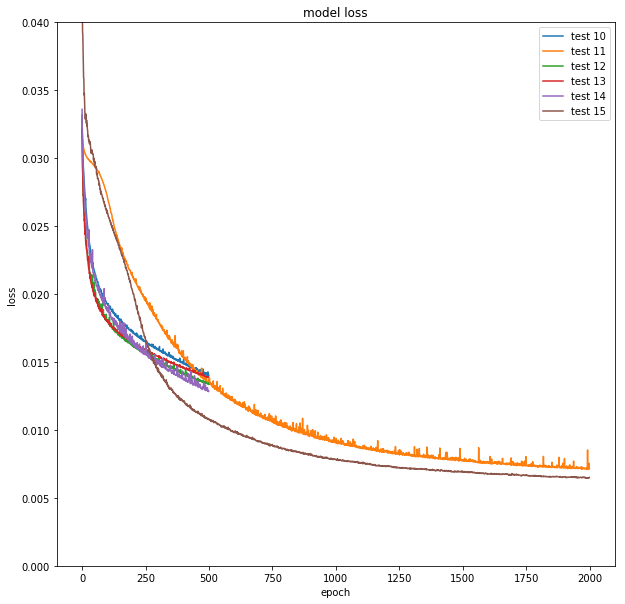

In [31]:
plt.figure(figsize=(10,10))

# plt.plot(history10.history['loss'])
plt.plot(cnn10_history['val_loss'])

# plt.plot(cnn11_history['loss'])
plt.plot(cnn11_history['val_loss'])

# plt.plot(history12.history['loss'])
plt.plot(cnn12_history['val_loss'])

# plt.plot(history13.history['loss'])
plt.plot(cnn13_history['val_loss'])

# plt.plot(history14.history['loss'])
plt.plot(cnn14_history['val_loss'])

# plt.plot(cnn15_history['loss'])
plt.plot(cnn15_history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['test 10', 'test 11', 'test 12', 
            'test 13', 'test 14', 'test 15'], loc='upper right')

# plt.legend(['train 9', 'test 9', 'train 10', 'test 10', 'train 11', 'test 11',
#             'train 12', 'test 12', 'train 13', 'test 13', 'train 14', 'test 14'], loc='upper right')
plt.ylim(0, .04)
plt.show()

In [16]:
# with zipfile.ZipFile('data/test.zip') as zip:
#     with zip.open('test.csv') as myZip:
#         df_test = pd.read_csv(myZip)

In [17]:
# X_test = df_test['Image'].apply(lambda image: np.fromstring(image, sep=' '))
# X_test = np.vstack(X_test)/255

In [18]:
# X2_test = X_test.reshape(-1, 96, 96, 1)

In [32]:
y_pred_cnn = cnn15.predict(X_test)

In [33]:
y_pred_cnn = y_pred_cnn*48 + 48

In [34]:
cnn_pred_df = pd.DataFrame(y_pred_cnn, columns=mixed_data_final.drop('Image', axis=1).columns)

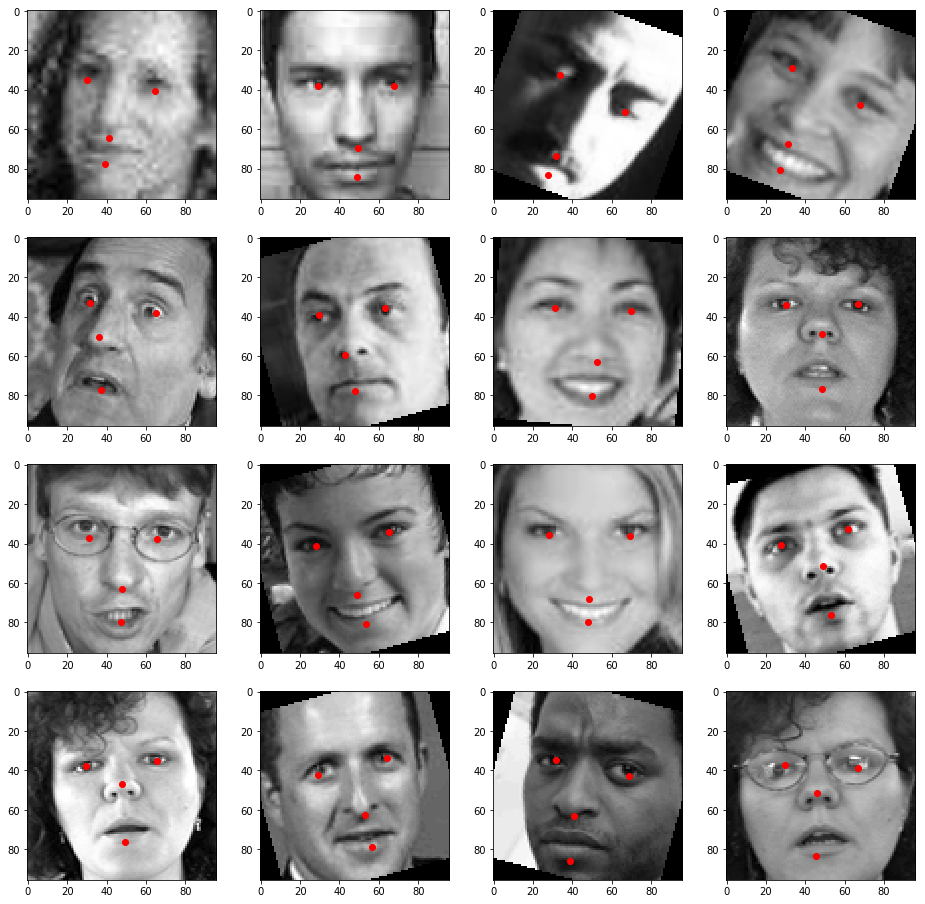

In [35]:
f, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        for k in range(4):
            ax[i, j].plot(cnn_pred_df.iloc[i*4 + j, 2*k], cnn_pred_df.iloc[i*4 + j, 2*k+1], c='r', marker='o')
        ax[i, j].imshow(X_test[i*4 + j].reshape(96, 96), cmap='gray')

In [36]:
a = mixed_data_final[mixed_data_final['nose_tip_y'] == max(mixed_data_final['nose_tip_y'])].iloc[1,:]

In [37]:
b = np.fromstring(a.Image, sep=' ')
b = np.vstack(b)/255

In [38]:
c = b.reshape(-1, 96, 96, 1)

In [40]:
single_pred = cnn15.predict(c)*48 +48
single_pred = pd.DataFrame(single_pred, columns=mixed_data_final.drop('Image', axis=1).columns)

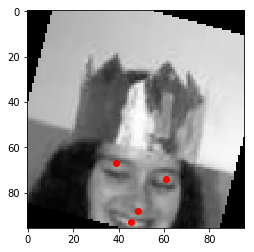

In [41]:
for k in range(4):
    plt.plot(single_pred.iloc[0, 2*k], single_pred.iloc[0, 2*k+1], c='r', marker='o')
plt.imshow(b.reshape(96, 96), cmap='gray')

In [28]:
y_train_pred_cnn = cnn5.predict(X)

In [29]:
y_train_pred_cnn = y_train_pred_cnn*48 + 48

In [30]:
cnn_train_pred_df = pd.DataFrame(y_train_pred_cnn, columns=mixed_data_final.drop('Image', axis=1).columns)

In [31]:
from random import randint

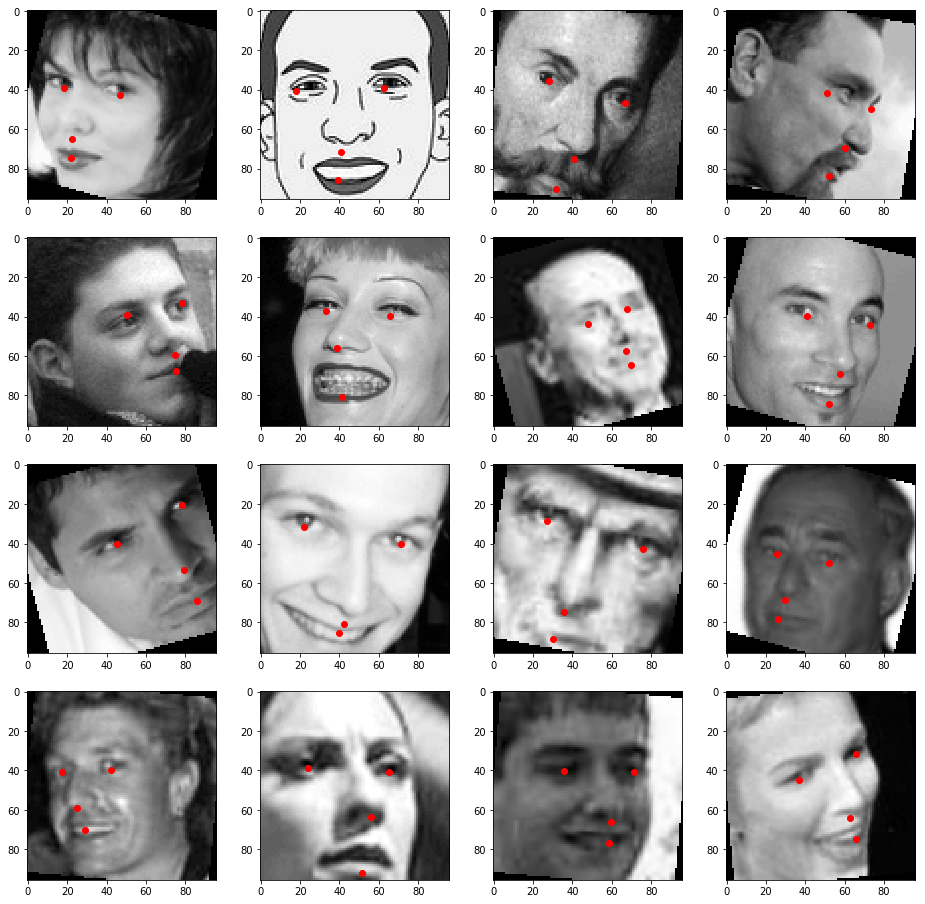

In [32]:
rndm = randint(0, 4000)
f, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        for k in range(4):
            ax[i, j].plot(cnn_train_pred_df.iloc[i*4 + j + rndm, 2*k], cnn_train_pred_df.iloc[i*4 + j + rndm, 2*k+1], c='r', marker='o')
        ax[i, j].imshow(X[i*4 + j + rndm].reshape(96, 96), cmap='gray')

In [33]:
with zipfile.ZipFile('data/training.zip') as zip:
    with zip.open('training.csv') as myZip:
        df = pd.read_csv(myZip)

In [34]:
df = df.loc[:, ['nose_tip_x', 'nose_tip_y',
                'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y',
                'left_eye_center_x', 'left_eye_center_y',
                'right_eye_center_x', 'right_eye_center_y',
                'Image']
           ].dropna()

df.shape

(7000, 9)

In [35]:
X_train = df['Image'].apply(lambda image: np.fromstring(image, sep=' '))
y_train = df.drop('Image', axis=1).values

In [36]:
X_train = np.vstack(X_train) / 255
y_train = (y_train - 48) / 48

In [37]:
X2_train = X_train.reshape(-1, 96, 96, 1)

In [38]:
# cnn.evaluate(X2_train, y_train)

In [39]:
original_df_preds = cnn5.predict(X2_train)

In [40]:
original_df_preds = original_df_preds*48 + 48

In [41]:
original_df_preds = pd.DataFrame(original_df_preds, columns=mixed_data_final.drop('Image', axis=1).columns)

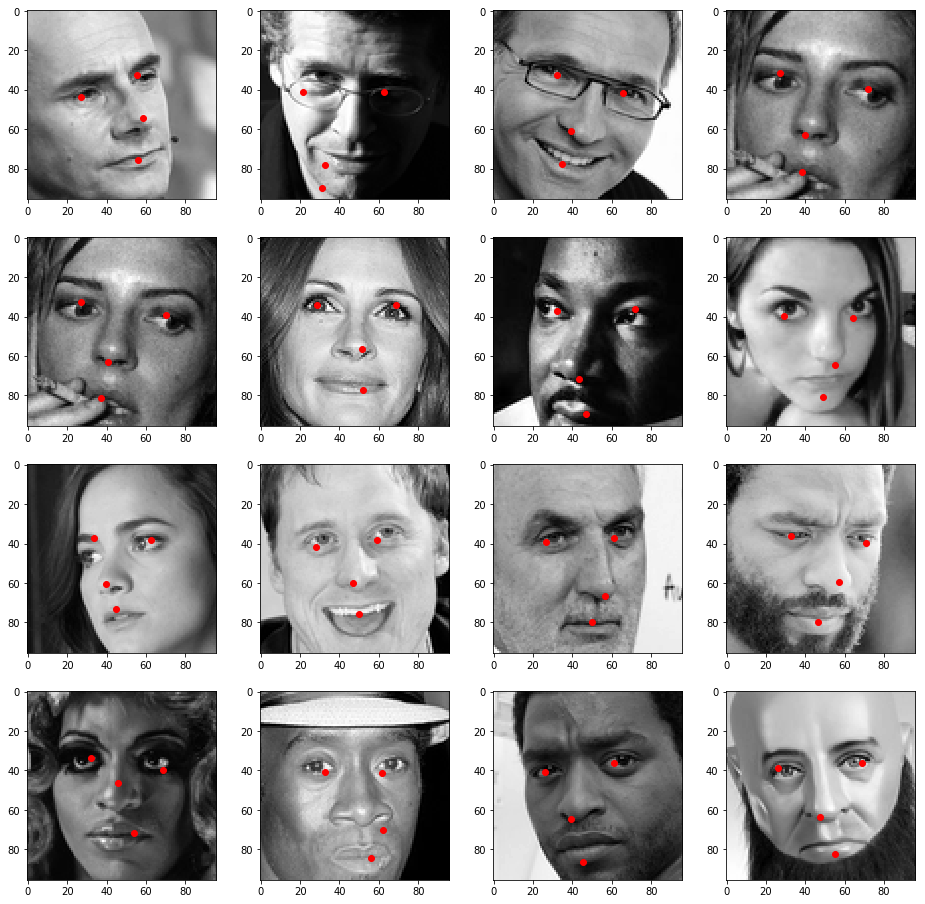

In [43]:
rndm = randint(0, 6980)
f, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        for k in range(4):
            ax[i, j].plot(original_df_preds.iloc[i*4 + j + rndm, 2*k], original_df_preds.iloc[i*4 + j + rndm, 2*k+1], c='r', marker='o')
        ax[i, j].imshow(X_train[i*4 + j + rndm].reshape(96, 96), cmap='gray')

In [44]:
rndm

1759

1759